In [1]:
import math
import itertools
import numpy as np
import matplotlib.pyplot as plt

#import plotly
#import plotly.express as px

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import tqdm
#from functools import lru_cache
#import re
import networkx as nx
from networkx.algorithms import approximation

import MDAnalysis as mda

#import scipy
#import sklearn
#import skimage

#import xml.etree.ElementTree as et
#from Bio.PDB import *
#import nglview as nv

from timeit import default_timer as timer



# http://nglviewer.org/nglview/latest/api.html
# https://biopython.org/wiki/The_Biopython_Structural_Bioinformatics_FAQ
# https://ambermd.org/tutorials/analysis/tutorial_notebooks/nglview_notebook/index.html
# https://amber-md.github.io/pytraj/latest/_api/pytraj.html

In [2]:
#contact_matrix = np.loadtxt('/home/lillo/TesiCNTE/CNTE/dataset/contact_matrix.txt')   #laptop
#contact_matrix = np.loadtxt('/home/lillo/Code/Tesi/dataset/contact_matrix.txt')        #fisso
#contact_matrix_single = contact_matrix.reshape(100,100,12,12)

#gromacs_output = open('/home/lillo/Code/Tesi/dataset/dm4500Compl_mix1_K2_1%4500ns.gro') #fisso
#gromacs_output = open('/home/lillo/TesiCNTE/CNTE/dataset/dm4500Compl_mix1_K2_1%4500ns.gro') #laptop

#path = '/home/lillo/Code/Tesi/dataset/dm4500Compl_mix1_K2_1%4500ns.gro' #fisso
#path = '/home/lillo/TesiCNTE/CNTE/dataset/dm4500Compl_mix1_K2_1%4500ns.gro' #laptop

# import 2mxu file (beta sheet)

#path_to_mmCIF = open('/home/lillo/TesiCNTE/pdb/2mxu/2mxu.cif')  ## laptop
#path_to_pdb = '/home/lillo/TesiCNTE/pdb/2mxu/2mxu.pdb'  ## laptop
#pa_to_pdb = '/home/lillo/TesiCNTE/pdb/2mxu/2mxu.pdb'  ## laptop

#path_to_mmCIF = open('/home/lillo/Code/Tesi/pdb/2mxu/2mxu.cif')  ## fisso
#path_to_pdb = '/home/lillo/Code/Tesi/pdb/2mxu/2mxu.pdb'  ## fisso
#pa_to_pdb = '/home/lillo/Code/Tesi/pdb/2mxu/2mxu.pdb'  ## fisso

#seed_1_path = '/home/lillo/TesiCNTE/from_cluster/aggregate1.gro' # laptop
#seed_1_path = '/home/lillo/Code/Tesi/dataset/aggregate1.gro'    # Fisso

#prod_gro = '/home/lillo/TesiCNTE/from_cluster/prod/prod_part1/min.gro'            # laptop
#prod_xtc = '/home/lillo/TesiCNTE/from_cluster/prod/prod_part1/prod.xtc'           # laptop
#prod1_xtc = '/home/lillo/TesiCNTE/from_cluster/prod/prod_part2/prod-compl.xtc'    # laptop

prod_gro = '/home/lillo/Code/Tesi/dataset/prod/prod_part1/min.gro'           #fisso
prod_xtc = '/home/lillo/Code/Tesi/dataset/prod/prod_part1/prod.xtc'          #fisso
prod1_xtc = '/home/lillo/Code/Tesi/dataset/prod/prod_part2/prod-compl.xtc'   #fisso


#trj_xtc = '/home/lillo/TesiCNTE/CNTE/trajectory/prd-LDLK12-100mer-out-mol.xtc'  #laptop
#trj_gro = '/home/lillo/TesiCNTE/CNTE/trajectory/min-LDLK12-100mer-out-c.gro'    #laptop

trj_gro = '/home/lillo/Code/Tesi/dataset/trajectory_6_12_19/min-LDLK12-100mer-out-c.gro'     #fisso
trj_xtc = '/home/lillo/Code/Tesi/dataset/trajectory_6_12_19/prd-LDLK12-100mer-out-mol.xtc'   #fisso

lipase = '/home/lillo/Documenti/PDB/lipase/3d2c.pdb'
lipase1 = '/home/lillo/Documenti/PDB/lipase/1gpl.pdb'


#p73_2per_wat_seed_1_gro = '/home/lillo/TesiCNTE/from_cluster/peptide_73/MARTINI/2%/WATER/2%/seed_1/prod/73prod.gro'     # laptop
#p73_2per_wat_seed_1_xtc = '/home/lillo/TesiCNTE/from_cluster/peptide_73/MARTINI/2%/WATER/2%/seed_1/prod/73prod.xtc'     # laptop
#p73_2per_wat_seed_1_trr = '/home/lillo/TesiCNTE/from_cluster/peptide_73/MARTINI/2%/WATER/2%/seed_1/prod/73prod.trr'     # laptop

In [ ]:
trj.number_of_BB_atoms

In [3]:
import torch

In [4]:
torch.cuda.is_available()

True

In [5]:
import morphoscanner

In [ ]:
%matplotlib notebook

In [ ]:
_gro = get_gro()
_xtc = get_xtc()

trj = trajectory(_gro, _xtc)

print('Your trajectory has %d frames' % trj.number_of_frames)
print('Your trajectory has %d BB atoms' % trj.number_of_BB_atoms)


peptide_length = peptide_length(sentence='Set the number of aminoacids in one peptide (int): ')
interval = get_interval(sentence='Set the interval between sampled frames (int): ')
start_from = start_from(sentence='Set the index from which you want to start.\n\n0 if you have a single simulation.\n0 if you are analyzing split1.\nlen(split1) if you are analyzing split2.\ninteger: ')

output_path, file_name = get_destination_dir_and_name()


trj.compose_database(peptide_length=peptide_length, interval=interval)
trj.analyze_inLoop()
trj.get_data()
trj.get_database()
    

In [ ]:
t = torch.stack([torch.from_numpy(zero[e]) for e in zero])

In [ ]:
class database:

    '''Class that parse the trajectory and gives back frames with data.

    This class is used to represent data in an intuitive way to the user

    '''

    def __init__(self, peptide_length=None, start_from = 0, interval = 1):

        # cosa vuoi aggiungere?

        # forse è meglio se si fa una classe frames dentro la classe trajectory
        # e poi si istanzia la classe frame ad ogni frame campionato
        # e dentro si mettono anche i risultati dell'analisi
        # 
        # prendo a riferimento i frames, quindi la traiettoria
        # oppure prendo a riferimento il tipo di peptide?
        # forse meglio il frame, e poi posso tracciare le famiglie di peptidi tra
        # i frames.
        # 
        # devo anche individuare quali sono le sequenze
        # e raggruppare i peptidi con sequenza uguale
        # 
        #

        self.frames = {}
        self.peptide_length = peptide_length
        self.start_from = start_from
        self.interval = interval

        peptides_list = backend.topology.get_peptide_length_list(trj_gro)

        universe = backend.topology.make_universe(trj_gro, trj_xtc)


        if peptide_length == None:


            n_pep = len(peptides_list)


        else:

            n_pep = sum([(e // peptide_length) for e in peptides_list])



        self.frames = {}

        for index_ts, ts in tqdm.tqdm(enumerate(universe.trajectory)):

            updated_index = (index_ts + start_from)

            if (updated_index % interval) == 0:

                peptides = {}

                for peptide in range(n_pep):

                    peptides[peptide] = {}


                    if peptide == 0:

                        counter = 0

                    else:

                        # if to check peptide_length
                        if peptide_length == None:

                            counter += peptides_list[peptide - 1]

                        else:
                            counter += peptide_length




                    pep = single_peptide(universe, counter, peptide, peptide_length, peptides_list)

                    peptides[peptide] = pep

                self.frames[updated_index] = peptides

        return

In [ ]:
morphoscanner.backend.topology.get_peptide_length_list((trj_gro))

In [ ]:
cleaned = morphoscanner.backend.readGro.clean_gro(trj_gro)

In [ ]:
class single_peptide():
    
    ''' Class that define peptides
    
    '''
    
    def __init__(self):
        
        self.sequence
        self.coordinates
        

        return

In [ ]:
def dispatch_data(atom):
    
    if type(atom) != list:
        
        raise ValueError("%s is not a list, it is of type %s...\n " % (str(atom), type(atom)))
    
    else:
        
        atom_number = check_int_and_return(atom[0])
        
        residue_number = check_int_and_return(atom[1])
        
        residue_name = atom[2]
        
        x = float(atom[3])
        
        y = float(atom[4])
        
        z = float(atom[5])
        
    
    
        return atom_number, residue_number, residue_name, x, y, z
        
        
        

In [ ]:
dispatch_data(cleaned[0])

In [ ]:
type(cleaned[0]) == list

In [ ]:
import sys


def isInt(s):
    '''Check if s is type int and return bool.
    
    Input: object
    
    Output: bool'''
    
    try:
        return float(str(s)).is_integer()
    except:
        return False

    
    
def check_int_and_return(value):
    
    '''Check int and return value, else raise ValueError and print object type
    
    Input = object
    
    Output = int'''

    if isInt(value):

        return int(value)

    else:
        raise ValueError("%s is not an integer, it is of type %s...\n " % (str(value), type(value))) 


In [ ]:
length_list = morphoscanner.backend.topology.get_peptide_length_list (p73_2per_wat_seed_1_gro)

In [ ]:

c_list = {}
for idx, i in enumerate(peptides_dict[21].atom_numbers.values()):
    p = universe.atoms[i].position
    c_list[idx] = p

In [ ]:
c_list

In [ ]:
type(peptides_dict[0].frame_coordinates)

In [ ]:
### Mi serve un oggetto peptide con sequenza ed atom_number.
### La sequenza la prendo una volta sola e sarà sempre la stessa
### L'atom_number mi serve perché così posso prendermi le coordinate
### dai timestep quando voglio, anche per singolo peptide.

In [ ]:
c_list
first_key = [k for k in peptides_dict][0]
if type(peptides_dict[first_key].frame_coordinates) is dict:
    print('ok')

In [ ]:
def plot_peptide_list(coordinate_dict, peptide_list=None, centroid=False):
    '''
    Plot peptides from a trajectory frame.
    Using jupyter-notebook, use '%matplotlib notebook' to
    plot the points cloud in 3D.

    Parameters
    ----------
    coordinate_dict : dict
        Is the dict that contains all the coordinate
        of the atoms of a single frame.
        A single frame of the output of 
        backend.topology.get_coordinate_dict_from_trajectory 
        is a coordinate_dict.
        
    peptide_list : list, optional
        The default is None. By default all the peptides
        will be plotted.
            Is a list of int. Put here the index of the peptide
            or peptides that you want to plot.
            For example [0,2,5,24,1,6] to plot
            only these peptides.
        
    centroid : bool, optional
        The default is False.
            The centroid of a peptide can be plotted
            in red together with the selected peptide.
    
    Returns
    -------
    3D plot
        Return a scattered 3D plot.

    '''
    
      
    # if no peptide specified, plot all
    if peptide_list == None:
        peptide_list = [p for p in coordinate_dict]


    # if there is only a single peptide to show
    # use the single peptide function to normalize axis        
    if len(peptide_list) == 1:
        
        return plot_single_peptide(coordinate_dict[peptide_list[0]])
    
    else:
        
        x = []
        y = []
        z = []
        x_median = float
        y_median = float
        z_median = float


        for peptide in range(len(peptide_list)):
            x.append([peptide])
            y.append([peptide])
            z.append([peptide])
            for aminoacid in coordinate_dict[peptide_list[peptide]]:

                point = coordinate_dict[peptide_list[peptide]][aminoacid]
                x[peptide].append(point[0])
                y[peptide].append(point[1])
                z[peptide].append(point[2])

            del x[peptide][0]
            del y[peptide][0]
            del z[peptide][0]

        if centroid == True:

            def assemble_coordinate(axis_coordinate_list):
                median_list = []
                for coordinate_set in axis_coordinate_list:
                    median = np.median(coordinate_set)
                    median_list.append(median)
                return median_list

            x_median = assemble_coordinate(x)
            y_median = assemble_coordinate(y)
            z_median = assemble_coordinate(z)


        #%matplotlib notebook

        fig = plt.figure()

        ax = plt.axes(projection='3d')


        for pep in range(len(x)):

            ax.scatter3D(x[pep],y[pep],z[pep])

            if centroid == True:

                ax.scatter3D(x_median[pep], y_median[pep], z_median[pep], c='red')


        #return  plt.show(), [x,y,z], [x_median, y_median, z_median]         
    return plt.show()


In [ ]:
%matplotlib notebook

In [ ]:
morphoscanner.plot.plot.plot_single_peptide(c_list)

In [ ]:
plot_protein(c_list)

In [ ]:
#plot from trajectory positions  ### WORKING BUT YOU NEED TO:
# make_universe
# positions = universe.select_atoms('name BB').positions
def plot_peptide_from_trajectory_frame(positions, peptide_list=None, centroid=False):
    
    '''
    Plot atoms from universe.trajectory[frame]
    '''
       
    if peptide_list == None:
        
        peptide_list = [e for e in range(len(positions))]

    x = []
    y = []
    z = []

    for peptide in range(len(peptide_list)):
        x.append([peptide])
        y.append([peptide])
        z.append([peptide])

        point = positions[peptide_list[peptide]]
        #print(peptide, point)
        x[peptide].append(point[0])
        y[peptide].append(point[1])
        z[peptide].append(point[2])

        del x[peptide][0]
        del y[peptide][0]
        del z[peptide][0]

    fig = plt.figure()

    ax = plt.axes(projection='3d')

    for pep in range(len(x)):

        # scatter points, making list from torch tensor item
        ax.scatter3D([e.item() for e in x[pep]],[e.item() for e in y[pep]],[e.item() for e in z[pep]])

    return plt.show()

In [ ]:
from morphoscanner import backend

In [ ]:
universe = mda.Universe(trj_gro, trj_xtc, in_memory=False)

In [ ]:
a = universe.trajectory[150].positions

In [ ]:
b = universe.trajectory[150].positions

In [ ]:
a == b

In [ ]:
def plot_peptide_list(coordinate_dict, peptide_list=None, centroid=False):
    '''Plot peptides from a trajectory frame.
        Using jupyter-notebook, use '%matplotlib notebook' to
        plot the points cloud in 3D.
    
    Inputs:     coordinate_dict, dict   Is the dict that contains all the coordinate
                                        of the atoms of a single frame.
                                        A single frame of the output of 
                                        backend.topology.get_coordinate_dict_from_trajectory 
                                        is a coordinate_dict.
    
                peptide_list, list.     is a list of int. Put here the index of the peptide
                                        or peptides that you want to plot
                                
                centroid,   bool.       default=False 
                                        The centroid of a peptide can be plotted
                                        in red together with the selected peptide.
                                           
    Return:     show a 3D plot
    '''
    
    # if there is only a single peptide to show
    # use the single peptide function to normalize axis    
    
    if peptide_list == None:
        peptide_list = [p for p in coordinate_dict]
    
    
    if len(peptide_list) == 1:
        
        return plot_single_peptide(coordinate_dict[peptide_list[0]])
    
    else:
        
        x = []
        y = []
        z = []
        x_median = float
        y_median = float
        z_median = float


        for peptide in range(len(peptide_list)):
            x.append([peptide])
            y.append([peptide])
            z.append([peptide])
            for aminoacid in coordinate_dict[peptide_list[peptide]]:

                point = coordinate_dict[peptide_list[peptide]][aminoacid]
                x[peptide].append(point[0])
                y[peptide].append(point[1])
                z[peptide].append(point[2])

            del x[peptide][0]
            del y[peptide][0]
            del z[peptide][0]

        if centroid == True:

            def assemble_coordinate(axis_coordinate_list):
                median_list = []
                for coordinate_set in axis_coordinate_list:
                    median = np.median(coordinate_set)
                    median_list.append(median)
                return median_list

            x_median = assemble_coordinate(x)
            y_median = assemble_coordinate(y)
            z_median = assemble_coordinate(z)


        #%matplotlib notebook

        fig = plt.figure()

        ax = plt.axes(projection='3d')


        for pep in range(len(x)):

            ax.scatter3D(x[pep],y[pep],z[pep])

            if centroid == True:

                ax.scatter3D(x_median[pep], y_median[pep], z_median[pep], c='red')


        #return  plt.show(), [x,y,z], [x_median, y_median, z_median]         
    return plt.show()

In [ ]:
l1 = [i for i in range(100,1001,100)]

In [ ]:
l2 = [i for i in range(10,101,10)]

In [ ]:
check_for_compatibility(to_split,split_size)

In [ ]:
from morphoscanner.backend.check_val import check_int_and_return, isInt

In [ ]:
import sys

In [ ]:
len_dict = morphoscanner.backend.topology.get_peptide_length_dict(peptide_length_list)

In [ ]:
len_dict.get(96)

In [ ]:
ask_for_splitting()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly as px 
import plotly.graph_objects as go

def plot_protein(coordinate_dict):
    x = []
    y = []
    z = []

    for residue in coordinate_dict:
        point = coordinate_dict[residue]
        x.append(point[0])
        y.append(point[1])
        z.append(point[2])


    x = np.asarray(x)
    y = np.asarray(y)
    z = np.asarray(z)

    fig = go.Figure(data = [go.Scatter3d (x = x, y = y, z= z)])
    return fig.show()

def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap = 'viridis', interpolation = 'nearest')
    plt.colorbar()
    return plt.show()

def get_euclidean_distance(point_1, point_2):

    euclidean_distance = np.sqrt(np.sum([((point_1[0] - point_2[0])**2), ((point_1[1] - point_2[1])**2), ((point_1[2] - point_2[2])**2)]))

    return euclidean_distance

def compute_distance_map(coordinate_dict):
    i = 0
    distance_map = np.zeros((len(coordinate_dict),len(coordinate_dict)))
    for  i  in range(i, len(coordinate_dict)-1):
        coordinate_1 = coordinate_dict[i] 
        for j in range(0, len(coordinate_dict)-1):
            coordinate_2 = coordinate_dict[j]
            euclidean_distance = get_euclidean_distance(coordinate_1, coordinate_2)
            distance_map[i][j] = euclidean_distance
            distance_map[j][i] = euclidean_distance
    return distance_map

def contact_map_helix(distance_map):
    contact_map = np.zeros((len(distance_map),len(distance_map)))
    for i in range(1, len(distance_map)-1):
        for j in range(1, len(distance_map)-1):
            if 0.45 < distance_map[i][j] < 0.46:
                contact_map[i][j] = 1
            elif 0.52 < distance_map[i][j] < 0.56:
                contact_map[i][j] = 2
    return contact_map

            
    
    
    
    
    

In [ ]:
to_split = check_input_multiple_int_recursive_with_sentence('Write the length of the peptides that you want to split (as an integer): ')

In [ ]:
to_split

In [6]:
import sys


def isInt(s):
    '''Check if s is type int and return bool.
    
    Input: object
    
    Output: bool'''
    
    try:
        return float(str(s)).is_integer()
    except:
        return False

    
    
def check_int_and_return(value):
    
    '''Check int and return value, else raise ValueError and print object type
    
    Input = object
    
    Output = int'''

    if isInt(value):

        return int(value)

    else:
        raise ValueError("%s is not an integer, it is of type %s...\n " % (str(value), type(value))) 


        
##############################
#############################
##############################


def ask_for_splitting(limit=5):

    answer = input("Do you want to split peptides? Write 'yes' or 'no': ")
    
    if answer not in {'n','no','y','yes'}:
        print('This is not a valid answer, please write yes or no.\n'
            '%d trial left.' % limit)
        limit -= 1
        if limit == 0:
            raise sys.exit('Too many wrong inputs. Closing...')
        else:
            return ask_for_splitting(limit=limit)

    elif answer in {'n', 'no'}:
        print('The .gro topology file is set as reference for the analysis')
        return False

    elif answer in {'y', 'yes'}:
        return True



def check_input_multiple_int_recursive_with_sentence(sentence, limit=5):
    
    value = input(sentence)
    input_list = value.split()
    
    if len(input_list) == 0:
        limit -= 1
        
        if limit == 0:
            raise sys.exit("Too many empty inputs. Closing...")
        else:
            print('%d trial left.\n'
                  'You forgot to insert a value...please retry.' % limit)
            return check_input_multiple_int_recursive_with_sentence(sentence=sentence, limit=limit)
    
    else:
        va_list = []
        for val in input_list:
            
            if isInt(val):
                va_list.append(int(val))
        
                
            else:
                limit -= 1
                print('%d trial left.' % (limit))
                if limit == 0:
                    raise sys.exit("%s is not an integer, it is of type %s...\nClosing... " % (str(val), type(val))) 
                else:
                    print("%s is not an integer, it is of type %s...\n " % (str(val), type(val)))
                    return check_input_multiple_int_recursive_with_sentence(sentence=sentence, limit=limit)
        
        return va_list
    
    
def check_for_compatibility(list1, list2):
    if len(list1) == len(list2):
        
        for e1, e2 in zip(list1, list2):
            if e1%e2 != 0:
                print('%d is not multiple of %d' % (e1,e2))
                return False
            
        
        else:
            return True
    
    else:
        raise ValueError('Your lists are of different len! list1 len = %d, list2 len = %d.' % (len(list1), len(list2)))


def get_splitting_dict(to_split, split_size):
    
    splitting_dict = {}
    
    for length, split_dim in zip(to_split, split_size):
        #check for divisibility
        if (length%split_dim) == 0:
            splitting_dict[length] = split_dim
    
    return splitting_dict

def get_new_peptides_length(peptide_length_list, splitting_dict):
    new_peptide_list = []
    for pep_length in peptide_length_list:
        if pep_length in splitting_dict.keys():
            new_size = splitting_dict[pep_length]
            new_peptide_list.extend([splitting_dict[pep_length] for p in range((pep_length//new_size))])
        else:
            new_peptide_list.append(pep_length)
    
    return new_peptide_list


#####################################
####################################
#####################################

class frames(object):
    
    pass
    
    
    #def __init__(self, coordinates):
        
        #self.coordinates = coordinates
        
        
        

# Classes in dev

class single_peptide():
    
    ''' Class that define peptides
    
    '''
    
    def __init__(self, seq, atom_n):
        
        self.sequence = seq
        self.atom_numbers = atom_n
        #self.frames_coordinates = frames()
        
        return
    
    
#    def get_coordinate_from_frame(self, frame, coordinates):
#        
#        name = 'frame_' + str(frame)
#
#        setattr(self.frames_coordinates, name, coordinates)
#        
#        return
    
    def get_coordinate_from_frame(self, frame, coordinates):
        
        
        try:
            self.frames[frame] = coordinates
        except:
            self.frames = {}
            self.frames[frame] = coordinates
        return


    
    
## WORKING NICELY FAST
def get_data_from_trajectory_frame(universe, frame, peptide_length_list, atom_to_select='BB'):

    # move universe frame to memory
    universe.trajectory[frame]

    coordinate_dict = {}
    residues_dict = {}
    atom_number_dict = {}
    
    res_counter = 0

    #print(length_list)
    for pep_index, peptide in enumerate(peptide_length_list):

        coordinate_dict[pep_index] = {}
        residues_dict[pep_index] = {}
        atom_number_dict[pep_index] = {}
        
        for res in range(peptide):

            actual_res = universe.residues[res_counter]
            
            for index, atom in enumerate(actual_res.atoms):

                atom_type = str(atom).split()[2]

                if atom_type == atom_to_select:
                    
                    atom_number = (int(str(atom).split()[1].split(':')[0]) - 1)

                    residue_name = (str(atom).split()[8].split(',')[0])

                    coordi = universe.atoms[atom_number].position

                    coordinate_dict[pep_index][res] = coordi
                    residues_dict[pep_index][res] = residue_name
                    atom_number_dict[pep_index][res] = atom_number
                    
                    res_counter += 1
                    
    return coordinate_dict, residues_dict, atom_number_dict
    #return residues_dict, atom_number_dict

In [ ]:
#splitting_dict

In [ ]:
sum(new_peptide_list)

In [ ]:
sum(peptide_length_list)

In [ ]:
universe = morphoscanner.backend.topology.make_universe(trj_gro,trj_xtc)
peptide_length_list = morphoscanner.backend.topology.get_peptide_length_list(trj_gro)
len_dict = morphoscanner.backend.topology.get_peptide_length_dict(peptide_length_list)
morphoscanner.backend.topology.print_peptides_length(len_dict)
have_to_split = ask_for_splitting()
if have_to_split:
    to_split = check_input_multiple_int_recursive_with_sentence('Write the length of the peptides that you want to split (as integer or list of integer separated by a space): ')
    split_size = check_input_multiple_int_recursive_with_sentence('\nWrite the length in which you want to split your peptides (as integer or list of integer separated by a space).\n'
                                                                 'The list should be of the same length of the list above, \nthe numbers have to be divisors of the numbers inserted above. ')
    compatible = check_for_compatibility(to_split, split_size)
    if compatible:
        splitting_dict = get_splitting_dict(to_split, split_size)
        new_peptides_length = get_new_peptides_length(peptide_length_list, splitting_dict)
        print('Splitting done!')

In [ ]:
have_to_split = ask_for_splitting()

In [43]:
class results():
    
    def __init__(self, frame):
        self.frame = frame
        pass

    def get_data(self, data_name, data):
        
        setattr(self, data_name, data)

In [13]:
class results():
    def __init__(self, frame):
    
        frame = frame
        print('Analyzing frame n° ', frame)
    
        frame_dict = self.get_frame(frame)
    
        frame_tensor = distance_tensor.get_coordinate_tensor_from_dict(frame_dict)
    
        start_dist = timer()
        frame_distance_maps = distance_tensor.compute_euclidean_norm_torch(frame_tensor)
        end_dist = timer()
        print('Time to compute distance is: ', (end_dist - start_dist))
    
        start_contc = timer()
        frame_contact = pattern_recognition.compute_contact_maps_as_array(frame_distance_maps)
        end_contc = timer()
        print('Time to compute contact is: ', (end_contc - start_contc))
    
        start_den = timer()
        frame_denoised, df = pattern_recognition.denoise_contact_maps(frame_contact)
        end_den = timer()
        print('Time to denoise: ', (end_den-start_den))
    
        frame_graph_full = graph.graph_v1(frame_denoised, df)
        setattr(self, 'graph', frame_graph_full)
        
        subgraphs = find_subgraph(frame_graph_full)        
        setattr(self, 'subgraph', subgraph)

In [63]:
from morphoscanner import backend, data_acquisition, trj_object
from morphoscanner.backend import distance_tensor, pattern_recognition, graph

from morphoscanner.backend.check_val import isInt
import sys


class trajectory:
    '''Class to operate on trajectory files.

    It makes an object that contain the trajectory of the simulation'''

    def __init__(self, trj_gro, trj_xtc):
        
        self.trj_gro = trj_gro
        self.trj_xtc = trj_xtc
        self.universe = backend.topology.make_universe(self.trj_gro, self.trj_xtc)
        self.number_of_frames = len(self.universe.trajectory)
        self.number_of_BB_atoms = len(self.universe.select_atoms('name BB'))
       
        self.peptide_length_list = backend.topology.get_peptide_length_list(self.trj_gro)
        self.len_dict = backend.topology.get_peptide_length_dict(self.peptide_length_list)
        
        print('In your trajectory there are %d frames.\n' % self.number_of_frames)
        print('In each frame there are %d BB atoms.\n' % self.number_of_BB_atoms)
        morphoscanner.backend.topology.print_peptides_length(self.len_dict)
        
        return
        
        
    def split(self, to_split: list, split_size: list):
        '''Manually split peptide_length_list in case of seeds.
        
        Input:
            to_split: list
                list of int or ints.
                Each int refers to the length of a peptides seed
                from self.len_dict.keys() that you want to split in single peptide.
                For example if in len dict there are seeds of length 96 that you want to split,
                to_split = [96]
                
            split_size: list
                list of int or ints.
                This is the size in which you want to split your to_split seeds.
                For example if you want to split your seeds of length 96 in peptides of length 12,
                split_size = [12]
                
        Output:
            Change the original self.peptide_length_list with a new list of splitted peptides.
        
        '''
        
        splitting_dict = data_acquisition.script_inputs.get_splitting_dict(to_split, split_size)
        self.peptide_length_list = data_acquisition.script_inputs.get_new_peptides_length(self.peptide_length_list, splitting_dict)
        print('Splitting done.\n')
        print('"peptide_length_list" attribute has been updated with the new length.')
        
        return
    
    
    def explore(self):
        
        frame = 0
        coordinate, sequence, atom_number = backend.topology.get_data_from_trajectory_frame(universe=self.universe, frame=frame, peptide_length_list= self.peptide_length_list)

        self.peptide = {}
        for seq, coord, atm_n in zip(sequence, coordinate, atom_number):

            self.peptide[seq] = trj_object.trj_objects.single_peptide(sequence.get(seq), atom_number.get(atm_n))
                
            self.peptide[seq].get_coordinate_from_frame(frame=frame, coordinates=coordinate.get(coord))
        
        print('Exploration of frame %d done.\n' % frame)
        
        return
    
    
    def compose_database(self, sampling_interval):
        
        steps = [s for s in range(self.number_of_frames) if s%sampling_interval==0 and s != 0]
        for step in tqdm.tqdm(steps):
            self.universe.trajectory[step]

            for pep in self.peptide:
                c_list = {}

                for idx, i in enumerate(self.peptide[pep].atom_numbers.values()):
                    p = self.universe.atoms[i].position
                    c_list[idx] = p

                self.peptide[pep].get_coordinate_from_frame(step, c_list)

        return
        
        
    def get_frame(self, frame):
        
        peptide_dict = {}
        for pep in self.peptide:

            peptide_dict[pep] = self.peptide[pep].frames[frame]
        
        return peptide_dict
    
    
    def get_peptide_in_all_frame(self, peptide):
    
        frame_dict = {}
        for frame in self.peptide[peptide].frames:
            
            frame_dict[frame] = self.peptide[peptide].frames[frame]
            
        return frame_dict
    

    
    def analysis(self, frame):
    
        frame = frame
        print('Analyzing frame n° ', frame)
    
        frame_dict = self.get_frame(frame)
    
        frame_tensor = distance_tensor.get_coordinate_tensor_from_dict(frame_dict)
    
        start_dist = timer()
        frame_distance_maps = distance_tensor.compute_euclidean_norm_torch(frame_tensor)
        end_dist = timer()
        print('Time to compute distance is: ', (end_dist - start_dist))
    
        start_contc = timer()
        frame_contact = pattern_recognition.compute_contact_maps_as_array(frame_distance_maps)
        end_contc = timer()
        print('Time to compute contact is: ', (end_contc - start_contc))
    
        start_den = timer()
        frame_denoised, df = pattern_recognition.denoise_contact_maps(frame_contact)
        end_den = timer()
        print('Time to denoise: ', (end_den-start_den))
    
        frame_graph_full = graph.graph_v1(frame_denoised, df)
        
        subgraphs = graph.find_subgraph(frame_graph_full)        

        
        try:
            self.results[frame] = results(frame)       

        except:
            self.results = {}
            self.results[frame] = results(frame)       

        self.results[frame].get_data('graph', frame_graph_full)
        self.results[frame].get_data('subgraphs', subgraphs)
        self.results[frame].get_data('cross_correlation', df)
        
        print('Finished analysis of frame n° %d' % frame)
        

In [64]:
t_test = trajectory(trj_gro, trj_xtc)

In your trajectory there are 151 frames.

In each frame there are 1200 BB atoms.

Length: 96, Peptides: 10
Length: 12, Peptides: 20


In [65]:
t_test.split([96],[12])

Splitting done.

"peptide_length_list" attribute has been updated with the new length.


In [66]:
t_test.explore()

Exploration of frame 0 done.



In [67]:
t_test.compose_database(1)

100%|██████████| 150/150 [00:05<00:00, 26.95it/s]


In [75]:
t_test.analysis(150)

Analyzing frame n°  150
Time to compute distance is:  2.0541023690002476
Time to compute contact is:  7.7533006730000125


100%|██████████| 69/69 [00:00<00:00, 154928.79it/s]

Time to denoise:  1.4828827709998222
Finished analysis of frame n° 150


In [50]:
import networkx as nx

In [77]:
t_test.results[150].cross_correlation

,peptide1,peptide2,NCC Value,shift index,contacts,sense
0,0,3,0.547723,11,10.0,antiparallel
1,0,7,0.640513,11,13.0,antiparallel
2,1,2,0.400000,9,10.0,antiparallel
3,1,5,0.421637,9,9.0,antiparallel
4,1,87,0.632456,21,5.0,parallel
...,...,...,...,...,...,...
96,86,92,0.564076,10,14.0,antiparallel
97,88,89,0.503953,8,7.0,antiparallel
98,88,95,0.377964,22,7.0,parallel
99,94,97,0.789352,9,13.0,antiparallel


<IPython.core.display.Javascript object>


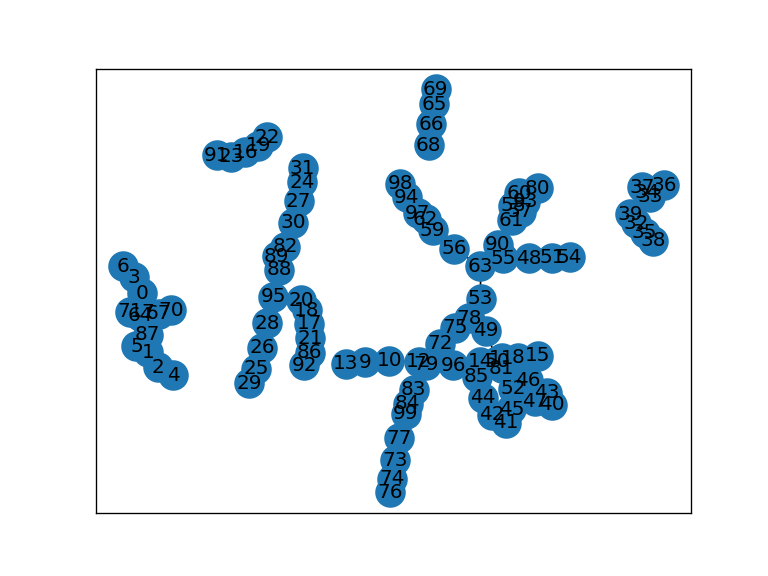

In [76]:
nx.draw_networkx(t_test.results[150].graph)

In [ ]:
# assemble a coordinate dict for each frame for a peptide
# assemble a coordinate dict for each peptide in a single frame

In [17]:
%matplotlib notebook

In [54]:
t_test.results[0].subgraphs

[[0, 3, 6, 7],
 [8, 11, 14, 15],
 [9, 10, 12, 13],
 [16, 19, 22, 23],
 [17, 18, 20, 21],
 [24, 27, 30, 31],
 [25, 26, 28, 29],
 [40, 43, 46, 47],
 [41, 42, 44, 45],
 [48, 51, 54, 55],
 [49, 50, 52, 53],
 [56, 59, 62, 63],
 [57, 58, 60, 61],
 [64, 67, 70, 71],
 [65, 66, 68, 69],
 [72, 75, 78, 79],
 [73, 74, 76, 77],
 [1, 2, 5],
 [32, 35, 39],
 [33, 34, 37]]

In [ ]:
morphoscanner.plot.plot.plot_peptide_list(a)

In [ ]:
# Instantiate universe and peptide list
universe = morphoscanner.backend.topology.make_universe(trj_gro,trj_xtc)
peptide_length_list = morphoscanner.backend.topology.get_peptide_length_list(trj_gro)


coordinate, sequence, atom_number = get_data_from_trajectory_frame(universe, 0, peptide_length_list)

peptides_dict = {}
for seq, coord, atm_n in zip(sequence, coordinate, atom_number):

    peptides_dict[seq] = single_peptide(sequence.get(seq), atom_number.get(atm_n))
    
    actual_frame = universe.trajectory.trajectory.frame
    
    peptides_dict[seq].get_coordinate_from_frame(frame=actual_frame, coordinates=coordinate.get(coord))

    
start = timer()
for step in steps:
    universe.trajectory[step]
    
    for pep in peptides_dict:
        c_list = {}
        
        for idx, i in enumerate(peptides_dict[pep].atom_numbers.values()):
            p = universe.atoms[i].position
            c_list[idx] = p
            
        peptides_dict[pep].get_coordinate_from_frame(step, c_list)
        
end = timer()
print(end-start)


In [ ]:
peptides_dict[0].frames.keys()

In [ ]:
#steps = [i for i in range(universe.trajectory.n_frames) if i%10 == 0]
steps = [i for i in range(universe.trajectory.n_frames)]


In [ ]:
single_process_dict = peptides_dict

In [ ]:
import os
import multiprocessing
from multiprocessing import Pool

#multiprocessing.cpu_count()
available_cpu = len(os.sched_getaffinity(0))

In [ ]:
t_test.peptide[0].frames[0]

In [ ]:
def analysis(frame):

    # WHY len(frame_denoised) is len(frame_dict)-1 ???????
    
    frame = frame
    print('Analyzing frame n° ', frame)

    frame_dict = t_test.get_frame(frame)

    frame_tensor = backend.distance_tensor.get_coordinate_tensor_from_dict(frame_dict)

    start_dist = timer()
    frame_distance_maps = backend.distance_tensor.compute_euclidean_norm_torch(frame_tensor)
    end_dist = timer()
    print('Time to compute distance is: ', (end_dist - start_dist))

    start_contc = timer()
    frame_contact = backend.pattern_recognition.compute_contact_maps_as_array(frame_distance_maps)
    end_contc = timer()
    print('Time to compute contact is: ', (end_contc - start_contc))

    start_den = timer()
    frame_denoised, df = backend.pattern_recognition.denoise_contact_maps(frame_contact)
    end_den = timer()
    print('Time to denoise: ', (end_den-start_den))

    #frame_graph = backend.graph.nx_graph_search(self.frame_denoised)
    
    frame_graph_full = backend.graph.graph_v1(frame_denoised, df)

    subgraphs = backend.graph.find_subgraph(frame_graph_full)

    self.[frame] = results.get_data(self, 'graph', frame_graph_full)
    self.results[frame].get_data(self, 'subgraph', subgraphs)
             

In [ ]:
a_dict = {}

In [ ]:
a_dict.update({'a':1, 'b':2})

In [ ]:
a_dict

In [ ]:
a_dict.update({'c':3, 'd':4, 'e': {'a':1, 'b':2, 'c':3}})

In [ ]:
a_dict

In [ ]:
class frames(object):
    
    pass
    
    
    #def __init__(self, coordinates):
        
        #self.coordinates = coordinates
        
        
        

# Classes in dev

class single_peptide():
    
    ''' Class that define peptides
    
    '''
    
    def __init__(self, seq, atom_n):
        
        self.sequence = seq
        self.atom_numbers = atom_n
        #self.frames_coordinates = frames()
        
        return
    
    
#    def get_coordinate_from_frame(self, frame, coordinates):
#        
#        name = 'frame_' + str(frame)
#
#        setattr(self.frames_coordinates, name, coordinates)
#        
#        return
    
    def get_coordinate_from_frame(self, frame, coordinates):
        
        
        try:
            self.frames[frame] = coordinates
        except:
            self.frames = {}
            self.frames[frame] = coordinates
        return

In [ ]:
"""
@author: lillo
"""
import numpy as np
import torch

def get_coordinate_from_pdb(file):
    '''
    Parse a pdb file. Support single chain and multiple chain

    Parameters
    ----------
    file : str
        The path of the .pdb file in your system.

    Returns
    -------
    coordinate_dict : dict
        A dict of dict with the coordinate of each atom of the pdb file.
        
        Depending on the input file it has different levels of nesting:
            
            for single chain:
                atom_index : [x,y,z]
                
            for multiple chain:
                
                chain_index : {atom index : [x,y,z]}
    '''
    
    with open(file) as pdbfile:

        coordinate_dict = {}
        atom_count_dict = {}
        start = 0

        for line in pdbfile:
            
            # split line
            splitted_line = [line[:6], line[6:11], line[12:16], line[17:20], line[21], line[22:26], line[30:38], line[38:46], line[46:54]]
            # get line header
            line_id = splitted_line[0].split()[0]
            
            #check for atom and heteroatom
            if line_id in {'ATOM', 'HETATM'}:
                
                # get CA atom only
                if splitted_line[2].split()[0] in {'CA'}:
                    
                    # get atom num for indexing
                    atom_num = int(splitted_line[5])
                    # get protein chain for indexing
                    chain = splitted_line[4]
                    # get coordinates
                    x, y, z = float(splitted_line[6]), float(splitted_line[7]), float(splitted_line[8])
                    
                    # check if actual chain already has an entry in coordinate_dict
                    if chain not in coordinate_dict.keys():
                        
                        # index from 'start'
                        atom_count_dict[chain] = start
                        # create key for new chain
                        coordinate_dict[chain] = {}
                        # put actual atom coordinates in coordinate_dict
                        coordinate_dict[chain][atom_count_dict[chain]] = np.array([x,y,z])
                    # if actual chain already in coordinate_dict
                    else:
                        # move index forward
                        atom_count_dict[chain] += 1
                        # add the atom coordinates
                        coordinate_dict[chain][atom_count_dict[chain]] = np.array([x,y,z])

    # if there is only one chain, flat the dict
    if len(coordinate_dict) == 1:
        coordinate_dict = coordinate_dict.get([k for k in coordinate_dict][0])

    return coordinate_dict


def get_coordinate_tensor_from_dict(coordinate_dict, device='cuda'):
    '''
        Convert a coordinate_dict to a torch.tensor, for parallel euclidean distance calculation.
        Works on dict in the form {atom_key : [x, y, z]}

    Parameters
    ----------
    coordinate_dict : dict
        Is the coordinate_dict in the form {key : [x, y, z]}.
        It also works for N-dimensional points.

    Returns
    -------
    zero : torch.tensor
        Returns a torch.tensor of shape n x m
        'n'  are the keys in coordinate_dict al len(coordinate_dict)
        'm' is the number of dimensions of your data points
        
        It save on gpu if torch.cuda.is_available(), else on cpu
        If you want to move your data on cpu, e.g. for visualization,
        you need to output_tensor.cpu()
    '''
    

    #variables with dict dimension
    dim0 = len(coordinate_dict)
    first_key = [k for k in coordinate_dict.keys()][0]
    dim1 = len(coordinate_dict[first_key])

    #initialize a 0s tensor
    #device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    zero = torch.zeros([dim0,dim1], dtype=torch.float32, device=device)

    for index, peptide in enumerate(coordinate_dict):
            
        zero[index] = torch.tensor(coordinate_dict[peptide], device=device)
                
    return zero


def get_tensors_from_multichain_dict(coordinate_dict):
    '''
    Generate tensor from multichain coordinate dict.
    Your coordinate_dict is in the form:
        
        {chain : {atom : [x, y, z] }}

    Parameters
    ----------
    coordinate_dict : dict
        Your coordinate_dict.
        It is in the form:
        {chain : {atom : [x, y, z] }}.

    Returns
    -------
    tensor_dict : dict
        It is a dict of tensor, one tensor per chain.

    '''
    tensor_dict = {}
    for chain in coordinate_dict:
        tensor_dict[chain] = get_coordinate_tensor_from_dict(coordinate_dict[chain])
    return tensor_dict


def distance_matrix_from_2d_tensor(peptide1_tensor, peptide2_tensor=None, device='cpu'):
    '''
    Minimal function to calculate euclidean distance between two set of points
    using quadratic expansion. Thanks to:
            https://discuss.pytorch.org/t/efficient-distance-matrix-computation/9065
            https://github.com/pytorch/pytorch/pull/25799
            https://github.com/pytorch/pytorch/issues/15253
    

    Parameters
    ----------
    peptide1_tensor : torch.tensor
        torch.tensor of shape n x d.
        
    peptide2_tensor : torch.tensor, optional
        The default is None.
        torch.tensor for which you want to calculate te distance from peptide1_tensor
        shape m x p
        
    device : str, optional
        The default is 'cpu'.
        Is the device on which to compute the calculation.
        You can set it to 'cuda' if you have an Nvidia GPU and CUDA driver installed

    Returns
    -------
    distance_map : torch.tensor
        shape n x p
        tensor with the distances data

    '''
    

    if peptide2_tensor == None:
        peptide2_tensor = peptide1_tensor

    # calculate distance
    x_norm = torch.pow(peptide1_tensor, 2).sum(1).view(-1,1)
    y_t = torch.transpose(peptide2_tensor, 0, 1)
    y_norm = torch.pow(peptide2_tensor, 2).sum(1).view(1,-1)
    
    distance_map = torch.sqrt(x_norm + y_norm - 2.0 * torch.mm(peptide1_tensor, y_t))
    
    # convert nan to 0  (using this instead of torch.clamp())       
    distance_map[torch.isnan(distance_map)] = 0
    
    # if you are calculating pointwise distance a single tensor
    # main diagonal is 0, to fix stability errors
    if peptide1_tensor is peptide2_tensor:
        distance_map = distance_map.fill_diagonal_(0)
    
    return distance_map


In [ ]:
t_test.peptide[0].

In [ ]:
def fast_cdist(x1, x2):
    adjustment = x1.mean(-2, keepdim=True)
    x1 = x1 - adjustment
    x2 = x2 - adjustment  # x1 and x2 should be identical in all dims except -2 at this point

    # Compute squared distance matrix using quadratic expansion
    # But be clever and do it with a single matmul call
    x1_norm = x1.pow(2).sum(dim=-1, keepdim=True)
    x1_pad = torch.ones_like(x1_norm)
    x2_norm = x2.pow(2).sum(dim=-1, keepdim=True)
    x2_pad = torch.ones_like(x2_norm)
    x1_ = torch.cat([-2. * x1, x1_norm, x1_pad], dim=-1)
    x2_ = torch.cat([x2, x2_pad, x2_norm], dim=-1)
    res = x1_.matmul(x2_.transpose(-2, -1))

    # Zero out negative values
    #res.clamp_min_(1e-30).sqrt_()
    res = res.sqrt()
    res[torch.isnan(res)]=0
    return res

In [ ]:

frame = 0
print('Analyzing frame n° ', frame)

frame_dict = t_test.get_frame(frame)

frame_tensor = backend.distance_tensor.get_coordinate_tensor_from_(frame_dict)

start_dist = timer()
frame_distance_maps = backend.distance_tensor.compute_euclidean_norm_torch(frame_tensor)
end_dist = timer()
print('Time to compute distance is: ', (end_dist - start_dist))

start_contc = timer()
frame_contact = backend.pattern_recognition.compute_contact_maps_as_array(frame_distance_maps)
end_contc = timer()
print('Time to compute contact is: ', (end_contc - start_contc))

start_den = timer()
frame_denoised, df = backend.pattern_recognition.denoise_contact_maps(frame_contact)
end_den = timer()
print('Time to denoise: ', (end_den-start_den))

#frame_graph = backend.graph.nx_graph_search(self.frame_denoised)

frame_graph_full = backend.graph.graph_v1(frame_denoised, df)

subgraphs = backend.graph.find_subgraph(frame_graph_full)

self.results[frame] = results.get_data(self, 'graph', frame_graph_full)
self.results[frame].get_data(self, 'subgraph', subgraphs)

In [ ]:
frame_tensor

In [ ]:
t_test.

In [ ]:
peptides_dict[0].frame_coordinates